In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the files

Saving Customers.csv to Customers.csv
Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv


Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  202

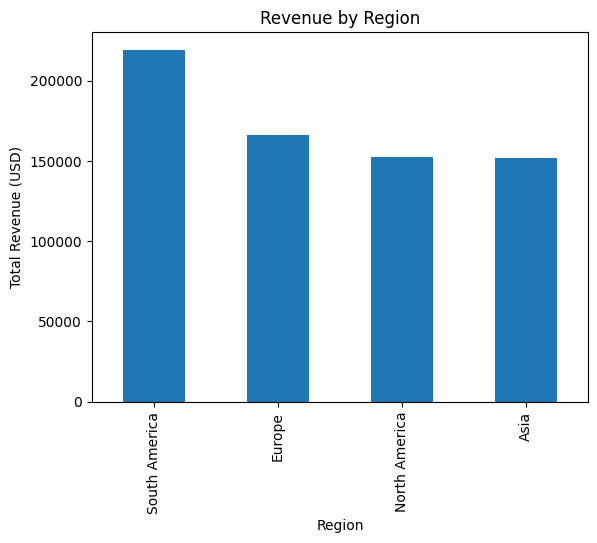

Most purchased product categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


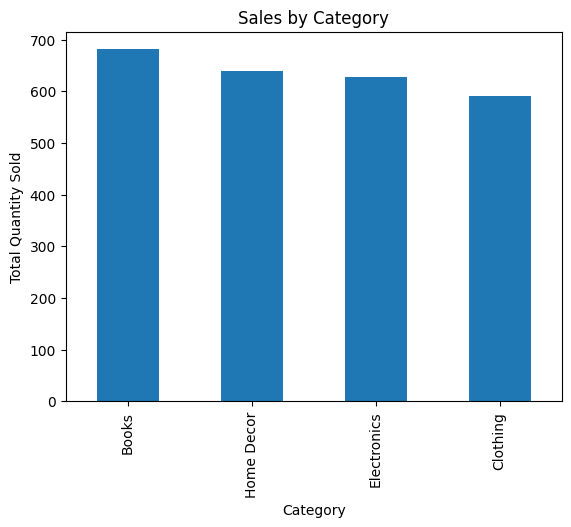

Top 10 Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


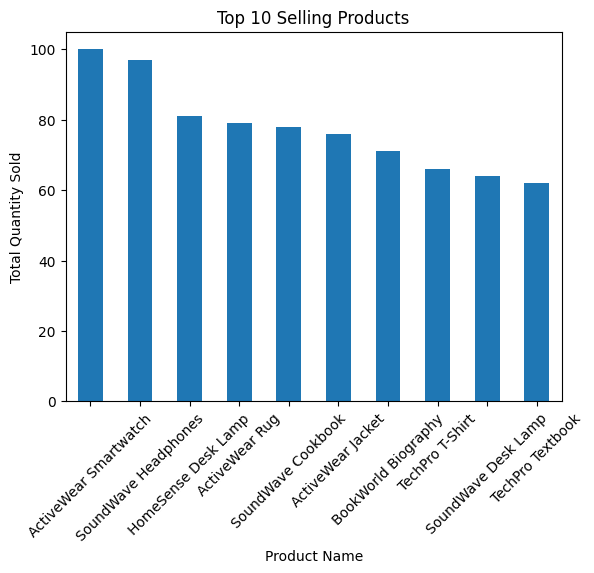

Monthly Sales Trends:
 YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


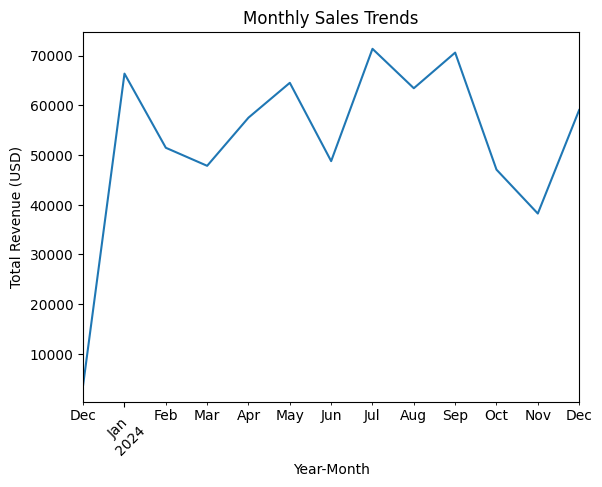

Top 10 Customers by Revenue:
 CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


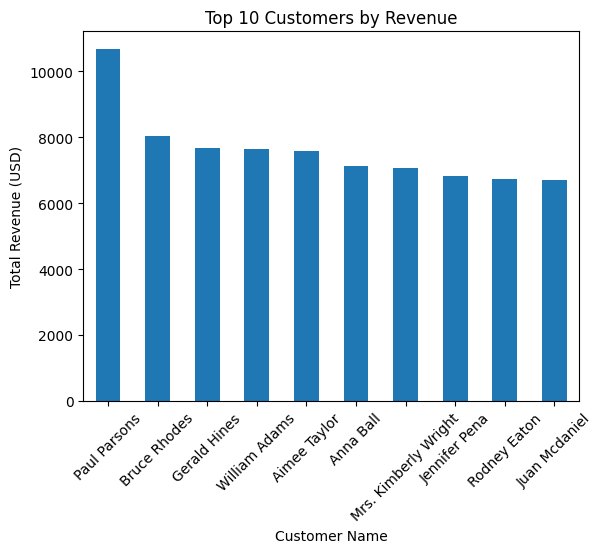

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview datasets
print("Customers:\n", customers.head())
print("Products:\n", products.head())
print("Transactions:\n", transactions.head())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

# Merge datasets
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Summary statistics
print("Summary of merged dataset:\n", data.describe())

# Distribution of revenue by region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", region_revenue)
region_revenue.plot(kind='bar', title='Revenue by Region', ylabel='Total Revenue (USD)', xlabel='Region')
plt.show()

# Most purchased product categories
category_sales = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Most purchased product categories:\n", category_sales)
category_sales.plot(kind='bar', title='Sales by Category', ylabel='Total Quantity Sold', xlabel='Category')
plt.show()

# Top-selling products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products:\n", top_products)
top_products.plot(kind='bar', title='Top 10 Selling Products', ylabel='Total Quantity Sold', xlabel='Product Name')
plt.xticks(rotation=45)
plt.show()

# Transaction trends over time
data['YearMonth'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['TotalValue'].sum()
print("Monthly Sales Trends:\n", monthly_sales)
monthly_sales.plot(title='Monthly Sales Trends', ylabel='Total Revenue (USD)', xlabel='Year-Month')
plt.xticks(rotation=45)
plt.show()

# Analyze top customers
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:\n", top_customers)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', ylabel='Total Revenue (USD)', xlabel='Customer Name')
plt.xticks(rotation=45)
plt.show()